**Problem Statement:**
Backorders are unavoidable, but by anticipating which things will be backordered,
planning can be streamlined at several levels, preventing unexpected strain on
production, logistics, and transportation. ERP systems generate a lot of data (mainly
structured) and also contain a lot of historical data; if this data can be properly utilized, a
predictive model to forecast backorders and plan accordingly can be constructed.
Based on past data from inventories, supply chain, and sales, classify the products as
going into backorder (Yes or No).

**What is Backorder ?** 
* A backorder is an order for a good or service that cannot be filled at the current time due to a lack of available supply. The item may not be held in the company's available inventory but could still be in production, or the company may need to still manufacture more of the product. Backorders are an indication that demand for a company's product outweighs its supply.<br>



**Key Takeaways<br>**
* A backorder is an order for a good or service that cannot be filled immediately because of a lack of available supply. 
* Backorders give insight into a company's inventory management. A manageable backorder with a short turnaround is a net positive, but a large backorder with longer wait times can be problematic.
* Companies with manageable backorders tend to have high demand, while those that can't keep up may lose customers.
* However, backorders allow for a company to maintain lower levels of inventory, have lower risk of obsolesce and theft, and may result in natural marketing for its highly demanded product.
* Popular products in high demand (i.e. next generation gaming consoles or new iterations of cell phones) may experience backorders.
#Data Description <br>
**• sku** - Random product(sku) code <br>
**• national_inv**  - Current inventory level of that sku <br>
**• lead_time** - Transit time for product(if available at source)  <br>
**• in_transit_qty** - Quantity in transit from source <br>
**• forecast_x_month** - Forecast sales for the net 3, 6, 9 months <br>
**• sales_x_month** - Sales quantity for the prior 1, 3, 6, 9 months <br>
**• min_bank** - Minimum recommended amount to stock <br>
**• potential_issue** - Indictor variable noting potential issue with item <br>
**• pieces_past_due** - Parts overdue from source <br>
**• perf_x_months_avg** - Source performance in the last 6 and 12 months <br>
**• local_bo_qty** - Amount of stock orders overdue <br>
**• deck_risk** – Part risk flag<br>
**• oe_constraint** – Part risk flag<br>
**• ppap_risk** – Part risk flag<br>
**• stop_auto_buy** – Part risk flag<br>
**• rev_stop** – Part risk flag<br>
**• went_on_backorder** - Product went on backorder <br>
## Get the Data
Welcome to Backorder Machine Learning Prediction Project !! Our task will be , to predict whether the products will go on backorder or not .

## Download the Data

In [244]:
##imports
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pathlib import Path
import tarfile

In [245]:

##Link to download test dataset is https://drive.google.com/file/d/1ABbfz7MjPLj2taxUxwsWxXgYsH-TnBNV/view?usp=share_link
##Link to download train dataset is https://drive.google.com/file/d/1CTiyE6BZlDK-UNYUuuT8FXszBvuT9luS/view?usp=share_link

# df_test = pd.read_csv(r"/content/drive/MyDrive/bo project data/dataset/Kaggle_Test_Dataset_v2.csv")
# df_train = pd.read_csv(r"/content/drive/MyDrive/bo project data/dataset/Kaggle_Training_Dataset_v2.csv")

In [246]:
def extract_dataset():
    Path("datasets").mkdir(parents=True , exist_ok=True)
    with tarfile.open("Kaggle_Test_Dataset_v2.csv.tgz.gz") as bo_tar:
        bo_tar.extractall(path="datasets")
    with tarfile.open("Kaggle_Training_Dataset_v2.csv.tgz.gz") as bo_tar:
        bo_tar.extractall(path="datasets")
    
    return pd.read_csv(Path("datasets/Kaggle_Test_Dataset_v2.csv")),pd.read_csv(Path("datasets/Kaggle_Training_Dataset_v2.csv"))
test_df, train_df = extract_dataset()

C:\Users\nitin\AppData\Local\Temp\ipykernel_22680\3518938932.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(Path("datasets/Kaggle_Test_Dataset_v2.csv")),pd.read_csv(Path("datasets/Kaggle_Training_Dataset_v2.csv"))
C:\Users\nitin\AppData\Local\Temp\ipykernel_22680\3518938932.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(Path("datasets/Kaggle_Test_Dataset_v2.csv")),pd.read_csv(Path("datasets/Kaggle_Training_Dataset_v2.csv"))


<h1>Take a Quick Look at the Data Structure

In [247]:
test_df.head()


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [248]:
test_df.shape

(242076, 23)

In [249]:
train_df.shape


(1687861, 23)

In [250]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [251]:
train_df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


# Lets Start EDA

<h5> There might be chances that train/test data samples are separated using random sampling method as we have not separated data by ourselves, so to improve accuracy of model we will merge both dataset , and create test set again for our model evaluation and see accuracy. After that we will again test with original test dataset(we are provided by company) as realworld data.

In [252]:
df = pd.concat([train_df, test_df], axis = 0)

In [253]:
df.shape

(1929937, 23)

In [254]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

array([[<AxesSubplot: title={'center': 'national_inv'}>,
        <AxesSubplot: title={'center': 'lead_time'}>,
        <AxesSubplot: title={'center': 'in_transit_qty'}>,
        <AxesSubplot: title={'center': 'forecast_3_month'}>],
       [<AxesSubplot: title={'center': 'forecast_6_month'}>,
        <AxesSubplot: title={'center': 'forecast_9_month'}>,
        <AxesSubplot: title={'center': 'sales_1_month'}>,
        <AxesSubplot: title={'center': 'sales_3_month'}>],
       [<AxesSubplot: title={'center': 'sales_6_month'}>,
        <AxesSubplot: title={'center': 'sales_9_month'}>,
        <AxesSubplot: title={'center': 'min_bank'}>,
        <AxesSubplot: title={'center': 'pieces_past_due'}>],
       [<AxesSubplot: title={'center': 'perf_6_month_avg'}>,
        <AxesSubplot: title={'center': 'perf_12_month_avg'}>,
        <AxesSubplot: title={'center': 'local_bo_qty'}>, <AxesSubplot: >]],
      dtype=object)

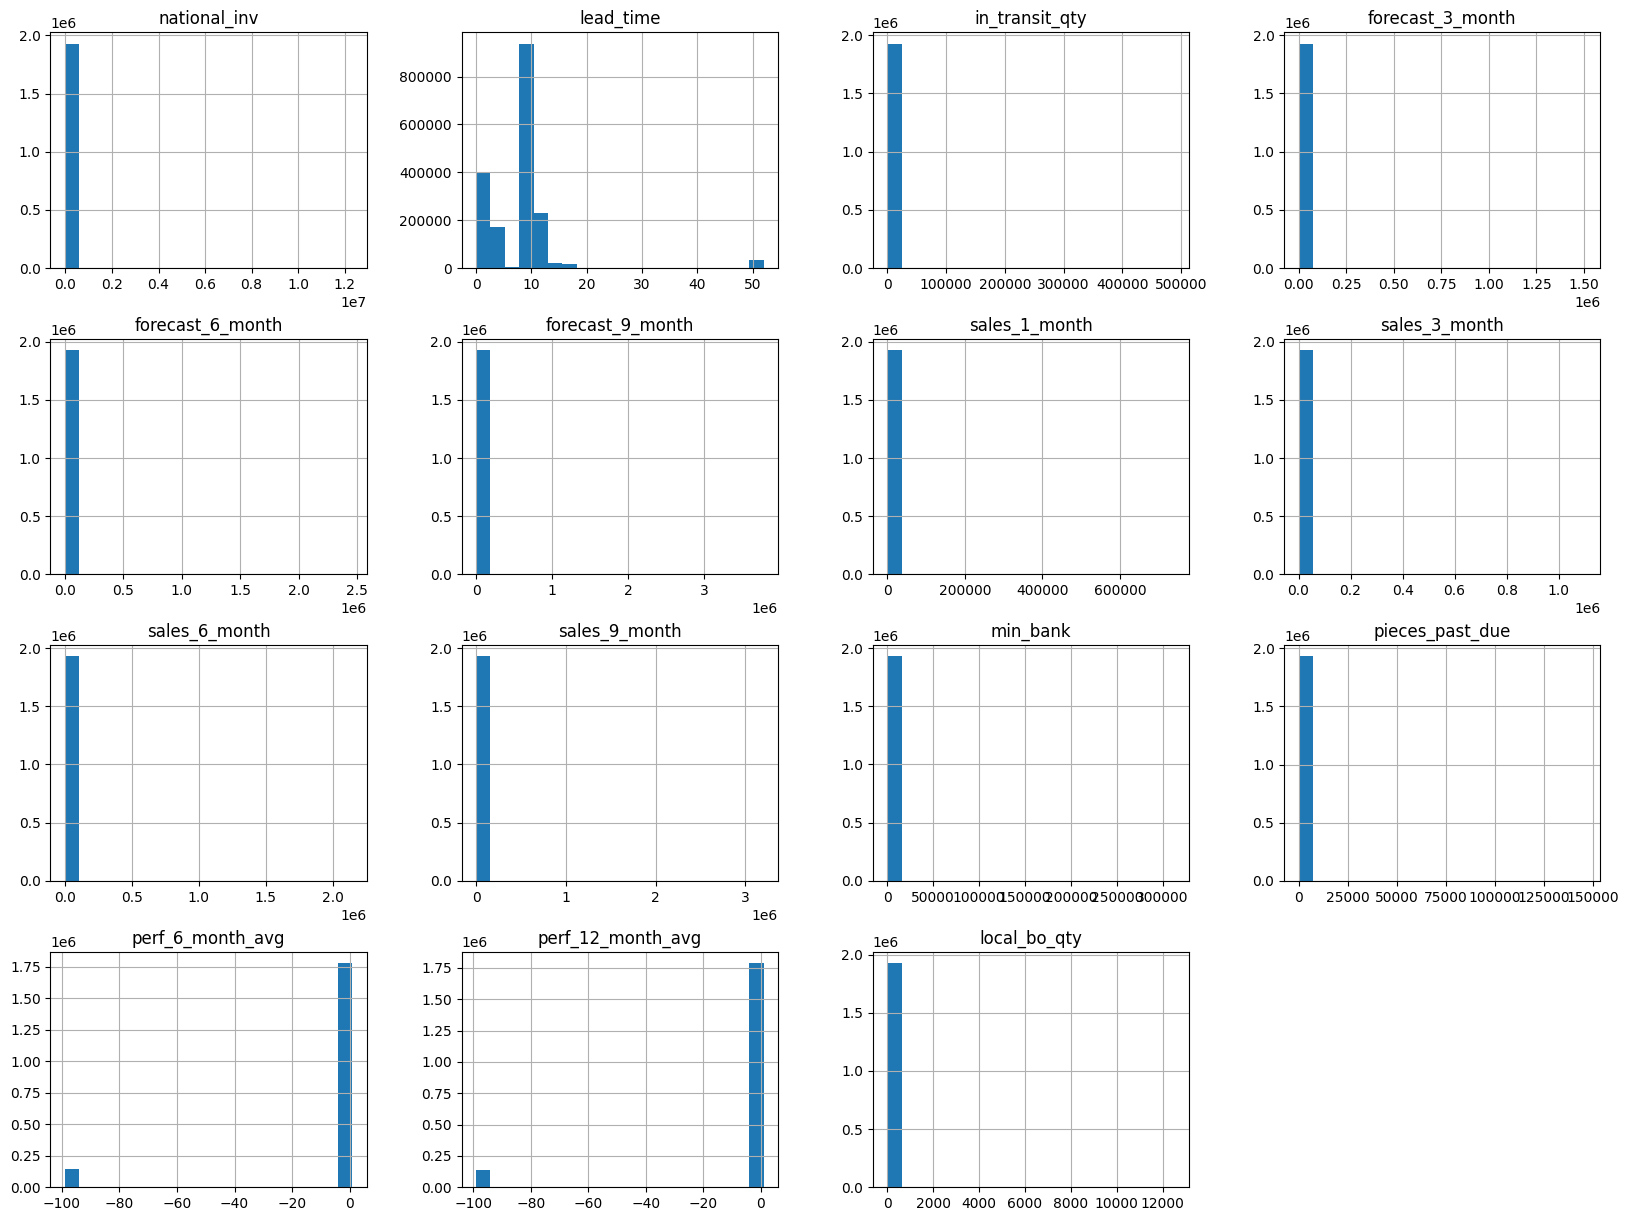

In [255]:
df.hist(bins=20, figsize=(20,15))

In [256]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [257]:
df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,4.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242075,(242075 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
df[-1:]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242075,(242075 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
#Lets remove last row of dataset

df.drop(df[-1:].index, inplace = True)

In [260]:
df[-1:]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,4.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [261]:
#make sku as index

df.set_index('sku' , inplace = True)

In [262]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,,
1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [263]:
## Separate Target Varibale first
X  = df.drop('went_on_backorder', axis = 1)
y = df['went_on_backorder']
print(df.shape, X.shape , y.shape)

(1929935, 22) (1929935, 21) (1929935,)


In [264]:
df.went_on_backorder.value_counts()

No     1915953
Yes      13981
Name: went_on_backorder, dtype: int64

In [265]:
df.went_on_backorder.value_counts(normalize = True)

No     0.992756
Yes    0.007244
Name: went_on_backorder, dtype: float64

<h2>only 0.7% sku's went on backorder

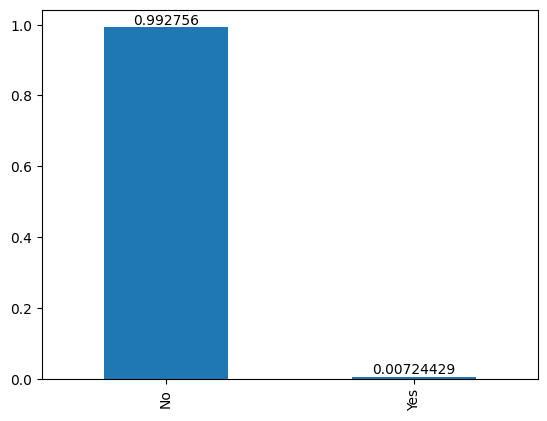

In [266]:
xh = df.went_on_backorder.value_counts(normalize=True)
ax = xh.plot(kind = 'bar')

for i in ax.containers:
    ax.bar_label(i,)

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77,
                                                    test_size=0.2)

In [268]:
print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

(1543948, 21) (1543948,) (385987, 21) (385987,)


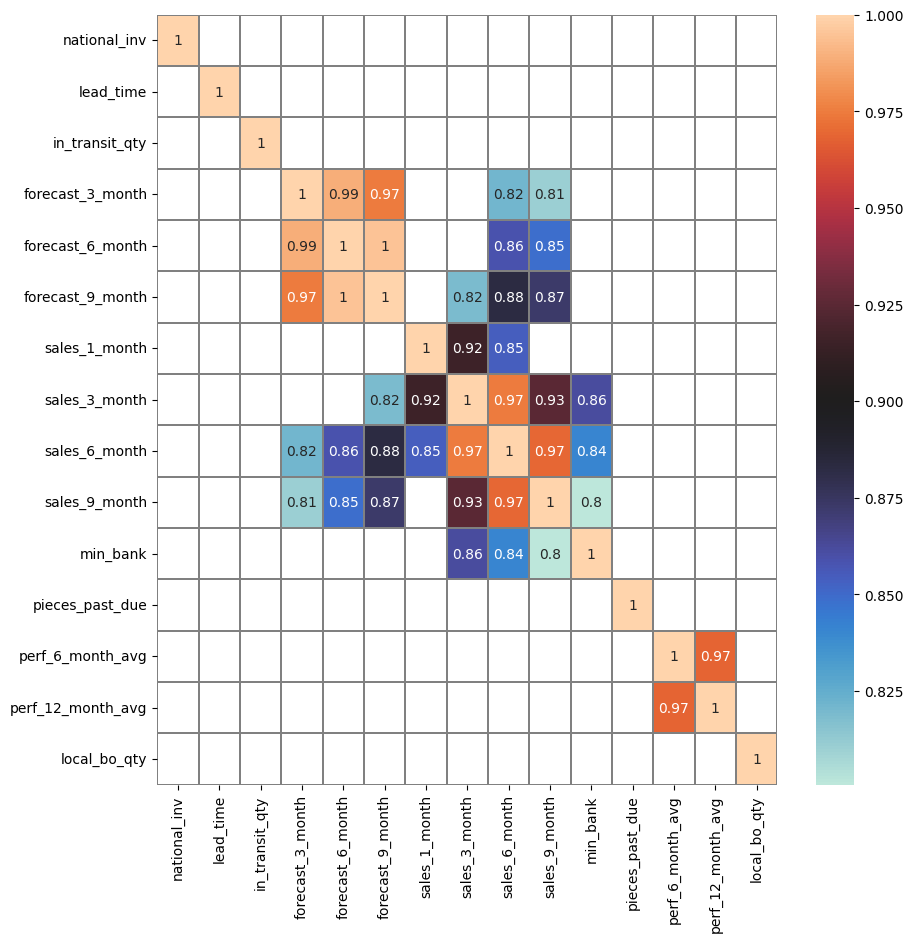

In [269]:

plt.figure(figsize=(10,10))
df_corr = X_train.select_dtypes(include = 'number').corr()
mask = df_corr.where(abs(df_corr)>=.80).isna()
sns.heatmap(df_corr ,mask = mask , annot = True ,
            cmap ='icefire', linewidth = 0.2, 
            linecolor = 'grey').set_facecolor('white')

Lots of features are correlated , we might drop some features to reduce computaion

In [270]:
X_train.select_dtypes(include= 'O')

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,,,,,,
1595833,No,No,No,No,Yes,No
1137539,No,Yes,No,No,Yes,No
1443962,No,No,No,No,Yes,No
3226295,No,No,No,No,Yes,No
1705322,No,No,No,No,Yes,No
...,...,...,...,...,...,...
2846370,No,No,No,No,Yes,No
3093419,No,No,No,No,Yes,No
1802210,No,No,No,Yes,Yes,No


In [271]:

# importing packages
from ydata_profiling import ProfileReport

In [272]:
profile = ProfileReport(df, title = 'BackOrder_Profile_Report')

In [273]:
# profile.to_file("report.html")

In [274]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1543948 entries, 1595833 to 2051180
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1543947 non-null  float64
 1   lead_time          1451385 non-null  float64
 2   in_transit_qty     1543947 non-null  float64
 3   forecast_3_month   1543947 non-null  float64
 4   forecast_6_month   1543947 non-null  float64
 5   forecast_9_month   1543947 non-null  float64
 6   sales_1_month      1543947 non-null  float64
 7   sales_3_month      1543947 non-null  float64
 8   sales_6_month      1543947 non-null  float64
 9   sales_9_month      1543947 non-null  float64
 10  min_bank           1543947 non-null  float64
 11  potential_issue    1543947 non-null  object 
 12  pieces_past_due    1543947 non-null  float64
 13  perf_6_month_avg   1543947 non-null  float64
 14  perf_12_month_avg  1543947 non-null  float64
 15  local_bo_qty       1543947 non-

In [275]:
X_train['lead_time'].isnull().sum()

92563

In [276]:
round(X_train.isnull().sum()/X_train.isnull().count()*100, 2)

national_inv         0.0
lead_time            6.0
in_transit_qty       0.0
forecast_3_month     0.0
forecast_6_month     0.0
forecast_9_month     0.0
sales_1_month        0.0
sales_3_month        0.0
sales_6_month        0.0
sales_9_month        0.0
min_bank             0.0
potential_issue      0.0
pieces_past_due      0.0
perf_6_month_avg     0.0
perf_12_month_avg    0.0
local_bo_qty         0.0
deck_risk            0.0
oe_constraint        0.0
ppap_risk            0.0
stop_auto_buy        0.0
rev_stop             0.0
dtype: float64

6% of missing values are only in lead_time feature

## Observations :
1.We can see , there was issue with last record in dataset, we have  removed that record.<br>
2.Features are having different scales , we need to convert it to same scales<br>
3.We can drop current index , and set sku as index.<br>
4.We will use OneHotEncoder for categorical columns<br>
5.We will work on missing values<br>
6.lead_time has most missing values i.e
 6% of the dataset<br>
7.Only 0.7 sku's are backordered. <br>
8. Features are right skewed, some of features need to be transformed.


<AxesSubplot: >

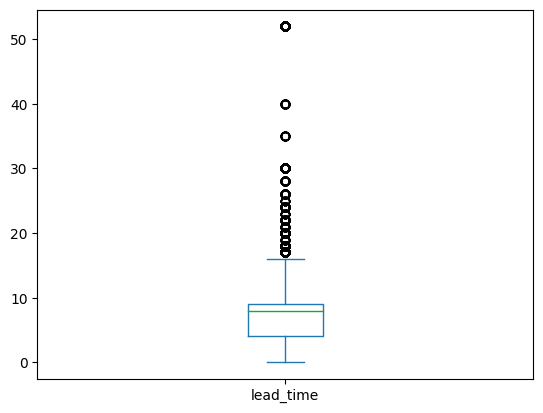

In [277]:
X_train.lead_time.plot(kind = 'box')

## Lets Clean Data

In [278]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer( strategy= 'median')
num_df =simple_imputer.fit_transform(X_train.select_dtypes(include = 'number'))

In [279]:
num_df

array([[20.  ,  8.  ,  0.  , ...,  0.79,  0.66,  0.  ],
       [14.  ,  4.  ,  0.  , ...,  0.69,  0.68,  0.  ],
       [ 2.  ,  8.  ,  0.  , ...,  0.99,  0.98,  0.  ],
       ...,
       [21.  ,  8.  ,  0.  , ...,  0.83,  0.86,  0.  ],
       [ 1.  ,  8.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 6.  ,  2.  ,  0.  , ...,  0.26,  0.53,  0.  ]])

In [280]:
simple_imputer.feature_names_in_

array(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'], dtype=object)

In [281]:
num_df = pd.DataFrame(num_df , columns = simple_imputer.feature_names_in_ , index= X_train.index)

In [282]:
num_df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
sku,,,,,,,,,,,,,,,
1595833,20.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.79,0.66,0.0
1137539,14.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.69,0.68,0.0
1443962,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.98,0.0
3226295,6.0,8.0,0.0,0.0,0.0,6.0,2.0,2.0,5.0,7.0,0.0,0.0,0.87,0.83,0.0
1705322,25.0,4.0,0.0,68.0,104.0,160.0,12.0,36.0,90.0,127.0,29.0,0.0,0.71,0.63,0.0


In [283]:
num_df.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
dtype: int64

In [285]:
cat_df = X_train.select_dtypes(include = 'O').dropna(axis = 0 )

In [286]:
cat_df

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,,,,,,
1595833,No,No,No,No,Yes,No
1137539,No,Yes,No,No,Yes,No
1443962,No,No,No,No,Yes,No
3226295,No,No,No,No,Yes,No
1705322,No,No,No,No,Yes,No
...,...,...,...,...,...,...
2846370,No,No,No,No,Yes,No
3093419,No,No,No,No,Yes,No
1802210,No,No,No,Yes,Yes,No


# Lets start feature engineering

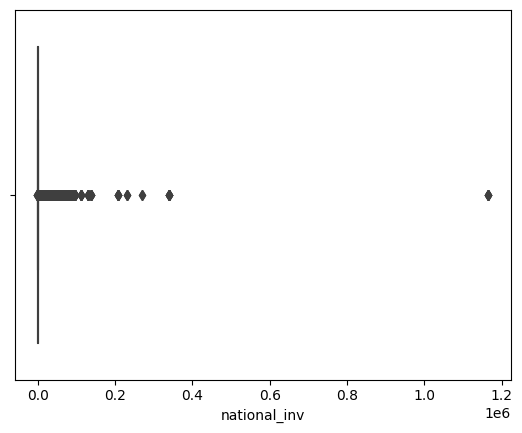

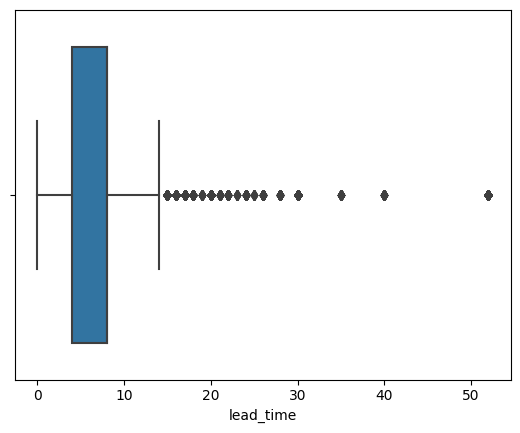

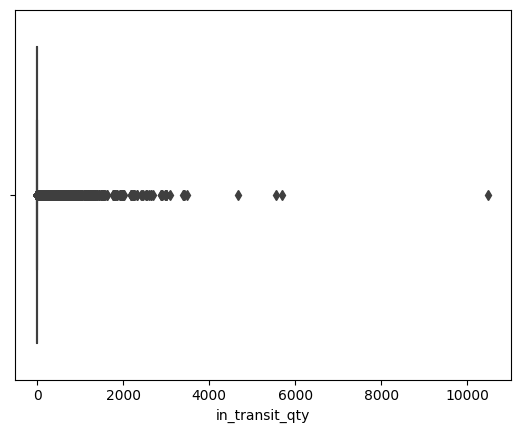

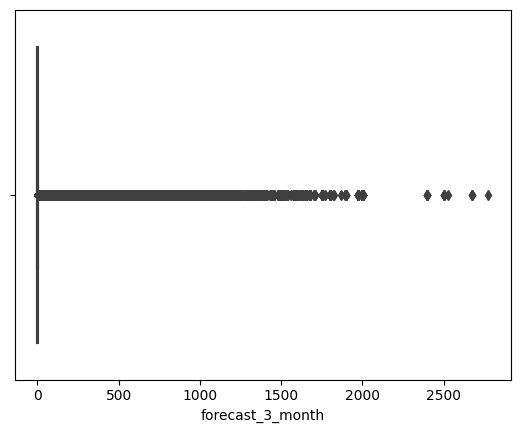

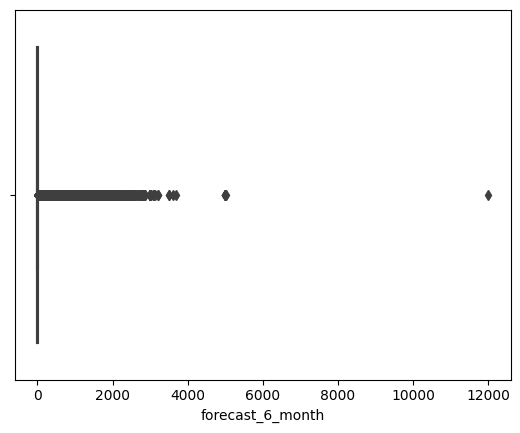

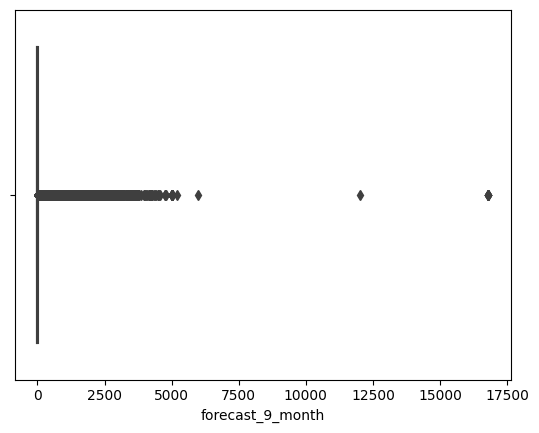

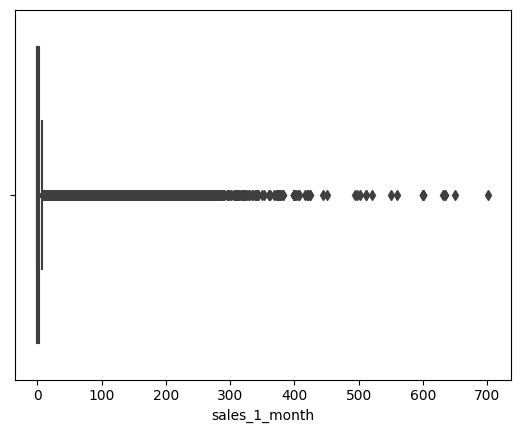

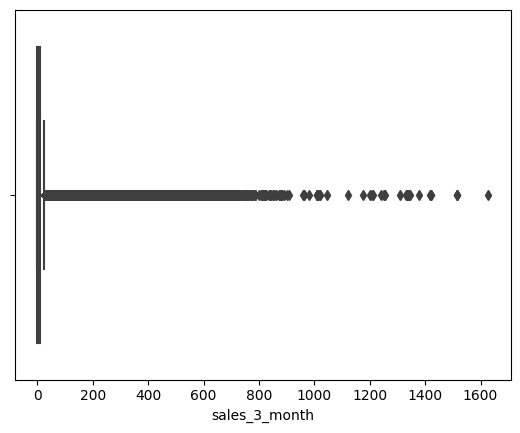

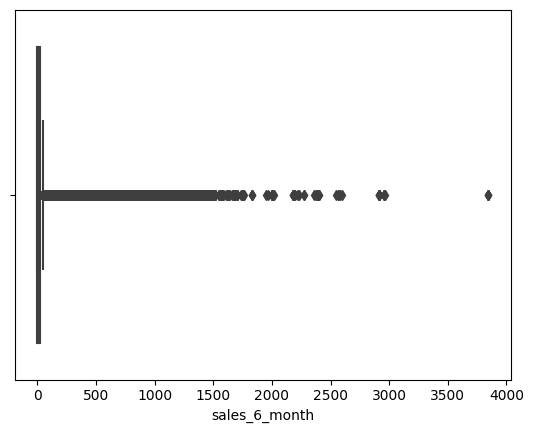

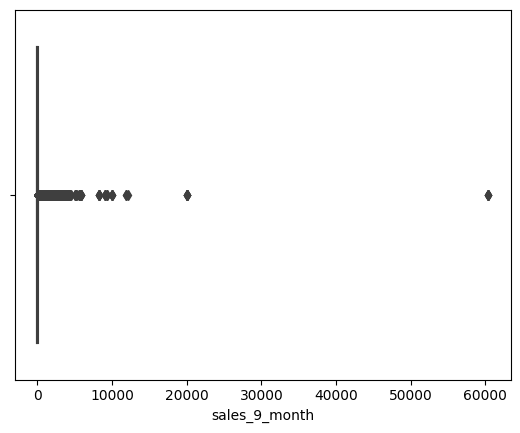

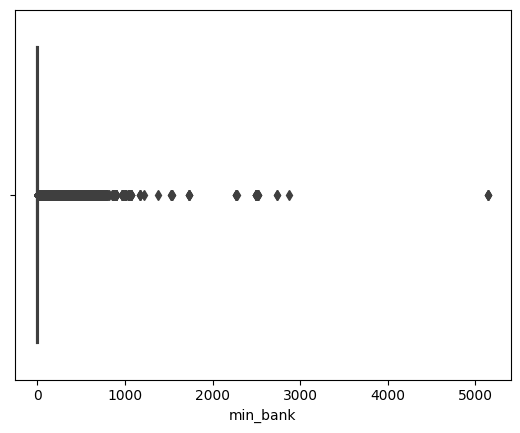

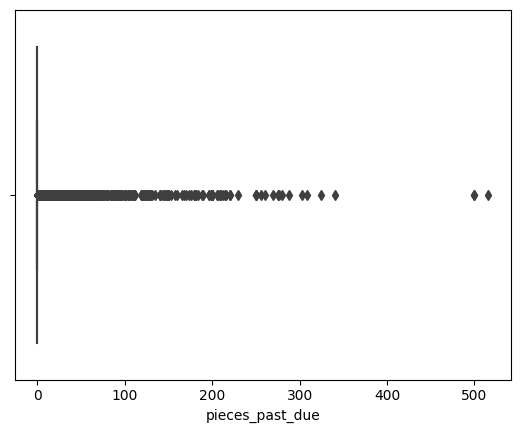

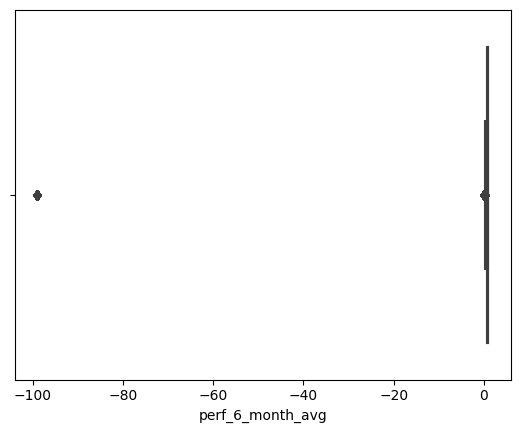

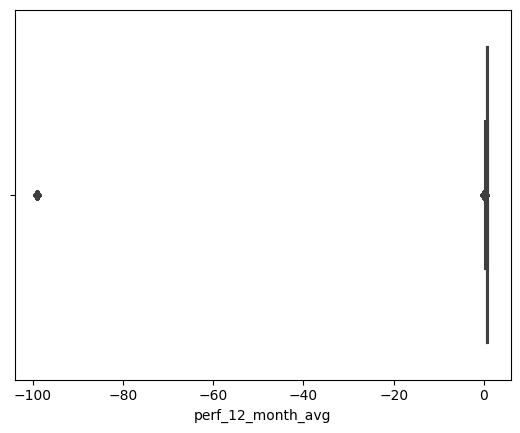

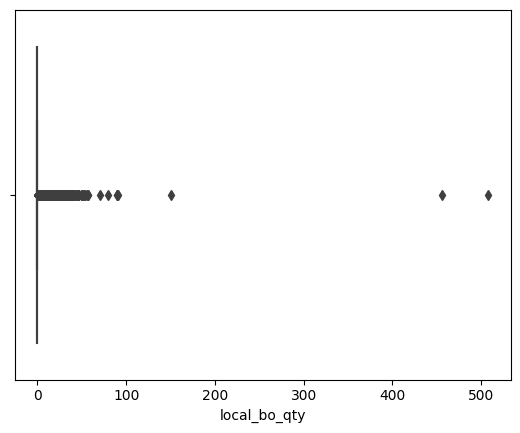

In [303]:
for i in num_df.columns:
    sns.boxplot(x = num_df[i])
    plt.show()
    

In [309]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=45, criterion = 'gini')